In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



# Transformação da melodia em ranhuras na estrada

https://www.researchgate.net/figure/ehicle-typical-damping-coefficient_tbl1_245401813

In [3]:
# Transformação do arquivo de audio WAV em um vetor y x t
from scipy.io import wavfile

sample_rate, data = wavfile.read('Wave_10s.wav')

print(sample_rate)


44100


In [4]:
print(data)

[[   0    0]
 [   0    0]
 [  -1    0]
 ...
 [ 138 -262]
 [ 902  288]
 [1666  839]]


# Meu dev

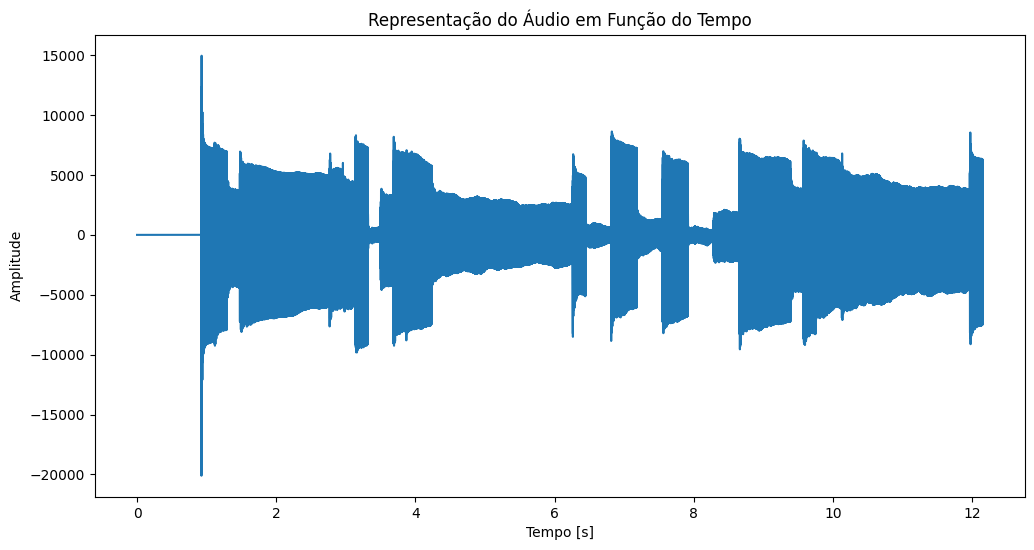

In [5]:
# possui dois canais, escolher somente um
if data.ndim > 1:
    data_y = data[:, 0]

duration = len(data) / sample_rate
time = np.linspace(0., duration, len(data))

plt.figure(figsize=(12, 6))
plt.plot(time, data_y)
plt.title('Representação do Áudio em Função do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

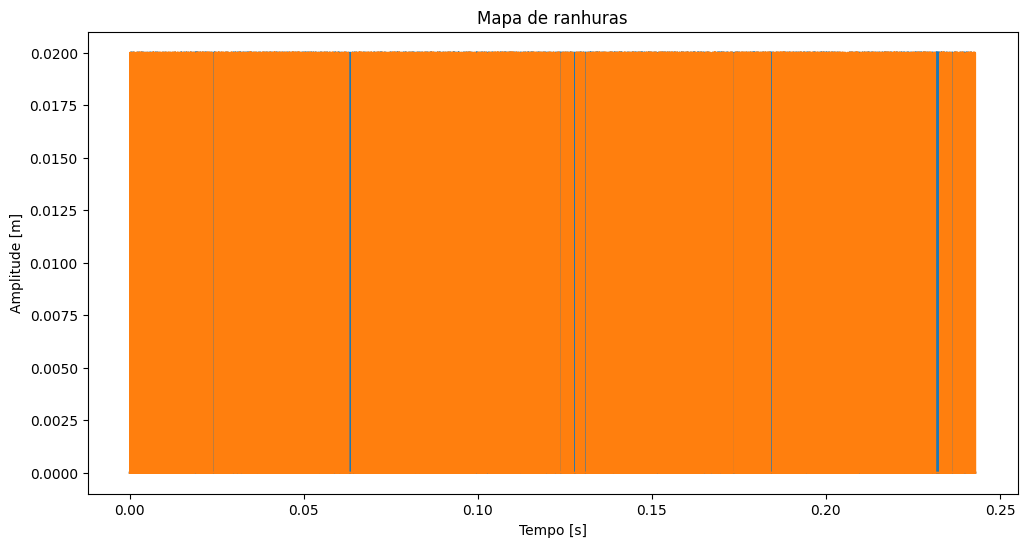

In [6]:
# Transformação do vetor anterior em um vetor para uma onda quadrada y x m. Considere
# a profundidade de cada ranhura constante e igual a 2 cm.

# teste com um segmento pequeno

# Definir um limiar para a onda quadrada
limiar = 0.1

# Transformar em onda quadrada
data_square = np.where(data >= limiar, 1, 0)

# Mapear a profundidade das ranhuras
PROFUNDIDADE = 0.02  # 2 cm
data_y_m = data_square * PROFUNDIDADE

# teste com um segmento pequeno
data_y_m = data_y_m[0:int(0.02*len(data_y_m))]
time_y_m = time[0:int(0.02*len(time))]
plt.figure(figsize=(12, 6))
plt.plot(time_y_m, data_y_m)
plt.title('Mapa de ranhuras')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [m]')
plt.show()

In [7]:
# Definição do mapa de ranhuras (10 linhas de 1 segundo cada)

# Dev do arthur

In [8]:
import librosa
import librosa.display

In [9]:
y, sr = librosa.load('Wave_10s.wav', sr=None)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


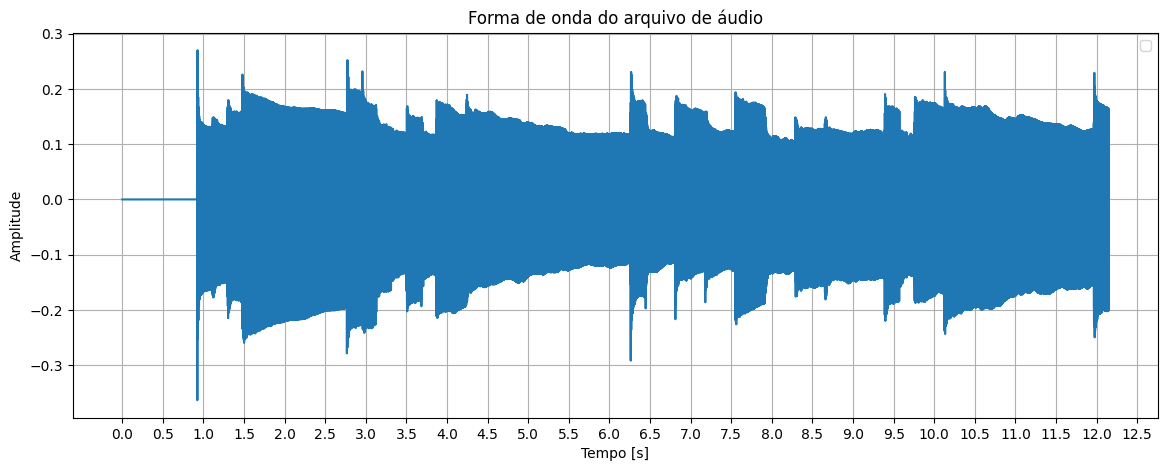

In [10]:
total_time = len(y) / sr
time_stamp = np.linspace(0, total_time, len(y))
plt.figure(figsize=(14, 5))
plt.plot(time_stamp, y)
plt.title('Forma de onda do arquivo de áudio')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 13, 0.5))
plt.show()

In [11]:
# Compute the STFT
D = librosa.stft(y, n_fft=2048, hop_length=512)

# Get the magnitude spectrogram
S = np.abs(D)

# Get the frequencies corresponding to the STFT bins
frequencies = librosa.fft_frequencies(sr=sr, n_fft=2048)

# Create a time array for plotting
times = librosa.times_like(S, sr=sr, hop_length=512)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


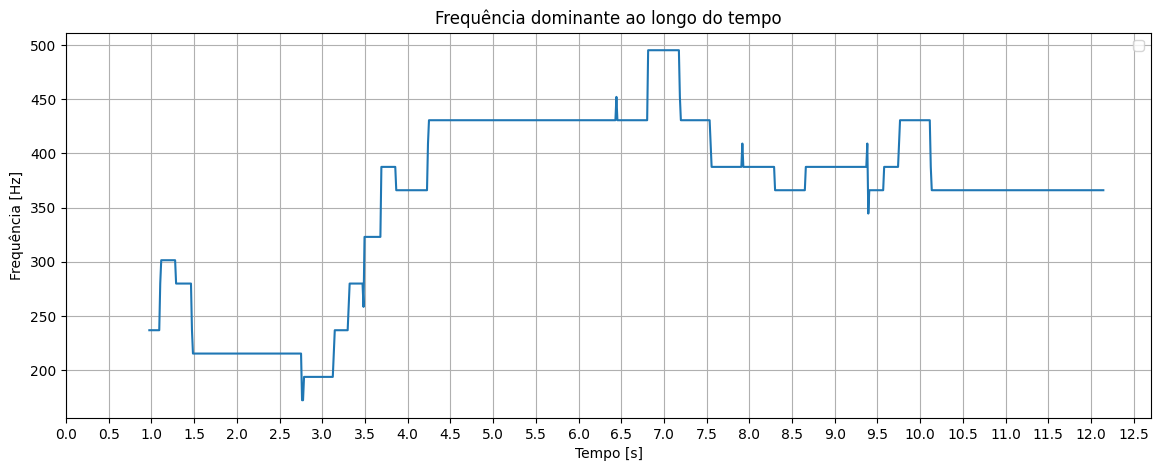

In [12]:
# Find the index of the maximum frequency at each time step
max_indices = np.argmax(S, axis=0)

# Get the corresponding dominant frequencies
dominant_frequencies = frequencies[max_indices]

times = times[84:1052]
dominant_frequencies = dominant_frequencies[84:1052]

dominant_frequencies[178] = dominant_frequencies[177]
dominant_frequencies[285] = dominant_frequencies[286]
dominant_frequencies[475] = dominant_frequencies[474]
dominant_frequencies[476] = dominant_frequencies[474]
dominant_frequencies[950] = dominant_frequencies[951]

df = pd.DataFrame({'t': times, 'f': dominant_frequencies})

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(times, dominant_frequencies)
plt.xlabel('Tempo [s]')
plt.ylabel('Frequência [Hz]')
plt.title('Frequência dominante ao longo do tempo')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 13, 0.5))
plt.show()

In [13]:
df.f.unique()

array([236.86523438, 279.93164062, 301.46484375, 215.33203125,
       172.265625  , 193.79882812, 258.3984375 , 322.99804688,
       387.59765625, 366.06445312, 409.13085938, 430.6640625 ,
       452.19726562, 495.26367188, 344.53125   ])

In [14]:
v = 60/3.6 # km/h to m/s

# distância percorrida pelo carro
df['delta_t'] = df['t'] - df['t'].shift(fill_value=0)
df['S [m]'] = v * df['delta_t']

# distancia entre duas ranhuras subsequentes 
df['L [m]'] = v / df['f']

# distância dos degraus
df['D [m]'] = df['L [m]']/2
df['W [m]'] = df['L [m]']/2
df

,t,f,delta_t,S [m],L [m],D [m],W [m]
0,0.975238,236.865234,0.975238,16.253968,0.070363,0.035182,0.035182
1,0.986848,236.865234,0.011610,0.193500,0.070363,0.035182,0.035182
2,0.998458,236.865234,0.011610,0.193500,0.070363,0.035182,0.035182
3,1.010068,236.865234,0.011610,0.193500,0.070363,0.035182,0.035182
4,1.021678,236.865234,0.011610,0.193500,0.070363,0.035182,0.035182
...,...,...,...,...,...,...,...
958,12.097596,366.064453,0.011610,0.193500,0.045529,0.022765,0.022765
959,12.109206,366.064453,0.011610,0.193500,0.045529,0.022765,0.022765
960,12.120816,366.064453,0.011610,0.193500,0.045529,0.022765,0.022765
961,12.132426,366.064453,0.011610,0.193500,0.045529,0.022765,0.022765


In [15]:
df.f.unique()

array([236.86523438, 279.93164062, 301.46484375, 215.33203125,
       172.265625  , 193.79882812, 258.3984375 , 322.99804688,
       387.59765625, 366.06445312, 409.13085938, 430.6640625 ,
       452.19726562, 495.26367188, 344.53125   ])

In [16]:
actual_dominant_freq = 0
instant_freq = 1
data_array = []
ti=0
tf=0

# iteramos sobre cada linha do df para pegar as frequencias em cada instante
# a partir do momemento que temos uma freq diferente da vista anteriormente
# sabemos o momento exato do fim da freq e o inicio da proxima
for idx, row in df.iterrows():
    instant_time = row['t']
    instant_freq = row['f']

    # caso tenha uma frequencia nova atualizamos a frequencia dominante do trecho
    if actual_dominant_freq != instant_freq:
        tf = instant_time
        data_array.append([instant_freq, ti, tf])
        ti = instant_time
        actual_dominant_freq = instant_freq
df_freq = pd.DataFrame(data_array, columns=['f', 'ti','tf'])

df_freq['S'] = v * df_freq['tf']
df_freq['delta_S'] = v * (df_freq['tf'] - df_freq['ti'])
df_freq

,f,ti,tf,S,delta_S
0,236.865234,0.000000,0.975238,16.253968,16.253968
1,279.931641,0.975238,1.102948,18.382464,2.128496
2,301.464844,1.102948,1.114558,18.575964,0.193500
3,279.931641,1.114558,1.288707,21.478458,2.902494
4,236.865234,1.288707,1.474467,24.574452,3.095994
5,215.332031,1.474467,1.486077,24.767952,0.193500
6,172.265625,1.486077,2.763175,46.052910,21.284958
7,193.798828,2.763175,2.786395,46.439909,0.386999
8,215.332031,2.786395,3.134694,52.244898,5.804989
9,236.865234,3.134694,3.146304,52.438398,0.193500


In [17]:
df_freq.loc[df_freq['f'] == 0, 'f'] =  882.861328	

In [18]:
df_no_duplicated = df[['f', 'L [m]', 'D [m]', 'W [m]']].drop_duplicates()
df_freq_merged = pd.merge(df_freq, df_no_duplicated[['f', 'L [m]', 'D [m]', 'W [m]']], on='f', how='inner')
df_freq_merged = df_freq_merged.sort_values(by='ti').reset_index(drop=True)
df_freq_merged

,f,ti,tf,S,delta_S,L [m],D [m],W [m]
0,236.865234,0.000000,0.975238,16.253968,16.253968,0.070363,0.035182,0.035182
1,279.931641,0.975238,1.102948,18.382464,2.128496,0.059538,0.029769,0.029769
2,301.464844,1.102948,1.114558,18.575964,0.193500,0.055286,0.027643,0.027643
3,279.931641,1.114558,1.288707,21.478458,2.902494,0.059538,0.029769,0.029769
4,236.865234,1.288707,1.474467,24.574452,3.095994,0.070363,0.035182,0.035182
5,215.332031,1.474467,1.486077,24.767952,0.193500,0.077400,0.038700,0.038700
6,172.265625,1.486077,2.763175,46.052910,21.284958,0.096750,0.048375,0.048375
7,193.798828,2.763175,2.786395,46.439909,0.386999,0.086000,0.043000,0.043000
8,215.332031,2.786395,3.134694,52.244898,5.804989,0.077400,0.038700,0.038700
9,236.865234,3.134694,3.146304,52.438398,0.193500,0.070363,0.035182,0.035182


In [19]:
# substituir o 0 por 882
df_freq_merged.loc[df_freq_merged['f'] == 0, ['L [m]', 'D [m]', 'W [m]']] = 0
df_freq_merged = df_freq_merged.round(3)
df_freq_merged.head()

,f,ti,tf,S,delta_S,L [m],D [m],W [m]
0,236.865,0.000,0.975,16.254,16.254,0.070,0.035,0.035
1,279.932,0.975,1.103,18.382,2.128,0.060,0.030,0.030
2,301.465,1.103,1.115,18.576,0.193,0.055,0.028,0.028
3,279.932,1.115,1.289,21.478,2.902,0.060,0.030,0.030
4,236.865,1.289,1.474,24.574,3.096,0.070,0.035,0.035


In [20]:
df_ranhuras = pd.DataFrame(columns=['S', 't', 'w_or_d'])

# loop que itera sobre o df e cria um novo df contendo o deslocamento total, tempo total e se no instante é D ou W

for idx, row in df_freq_merged.iterrows():
    # print(row)
    ti = row['ti']
    tf = row['tf']
    si = row['S'] - row['delta_S']
    sf = row['S']

    delta_s = np.arange(si, sf, 0.001)
    delta_t = np.linspace(ti, tf, len(delta_s))
    delta_p = np.linspace(0, 100, len(delta_s))
    counter = 0

    w = row['W [m]']
    w_or_d = []
    num_segments = len(delta_s) // int(w / 0.001)
    w_or_d = np.array(['W' if i % 2 == 0 else 'D' for i in range(num_segments + 1)])
    w_or_d = np.repeat(w_or_d, int(w / 0.001))
    w_or_d = w_or_d[:len(delta_s)]

    df_ranhuras_atual = pd.DataFrame({'S': delta_s, 't':delta_t,'w_or_d': w_or_d, '%': delta_p})
    df_ranhuras_atual['f'] = row['f']
    df_ranhuras = pd.concat([df_ranhuras, df_ranhuras_atual])
df_ranhuras

,S,t,w_or_d,%,f
0,0.000,0.000000,W,0.000000,236.865
1,0.001,0.000060,W,0.006152,236.865
2,0.002,0.000120,W,0.012305,236.865
3,0.003,0.000180,W,0.018457,236.865
4,0.004,0.000240,W,0.024609,236.865
...,...,...,...,...,...
189,168.921,10.135751,W,97.927461,366.064
190,168.922,10.135813,W,98.445596,366.064
191,168.923,10.135876,W,98.963731,366.064
192,168.924,10.135938,W,99.481865,366.064


In [21]:
df_ranhuras['f'].agg(['mean', 'median'])

mean      352.125971
median    387.598000
Name: f, dtype: float64

In [22]:
PERCENTUAL_SESSAO = 50
PROFUNDIDADE = 0.02
df_ranhuras['Profundidade [m]'] = np.where((df_ranhuras['w_or_d'] == 'W') & (df_ranhuras['%'] < PERCENTUAL_SESSAO), PROFUNDIDADE, 0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


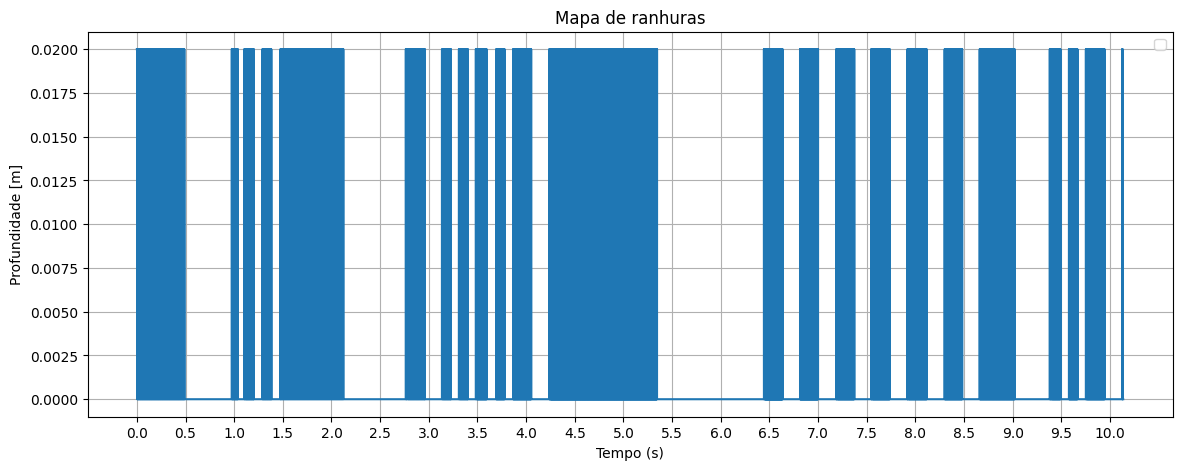

In [23]:
plt.figure(figsize=(14, 5))
plt.plot(df_ranhuras['t'], df_ranhuras['Profundidade [m]'])
plt.xlabel('Tempo (s)')
plt.ylabel('Profundidade [m]')
plt.title('Mapa de ranhuras')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0,df_ranhuras['t'].max(), 0.5))
plt.show()

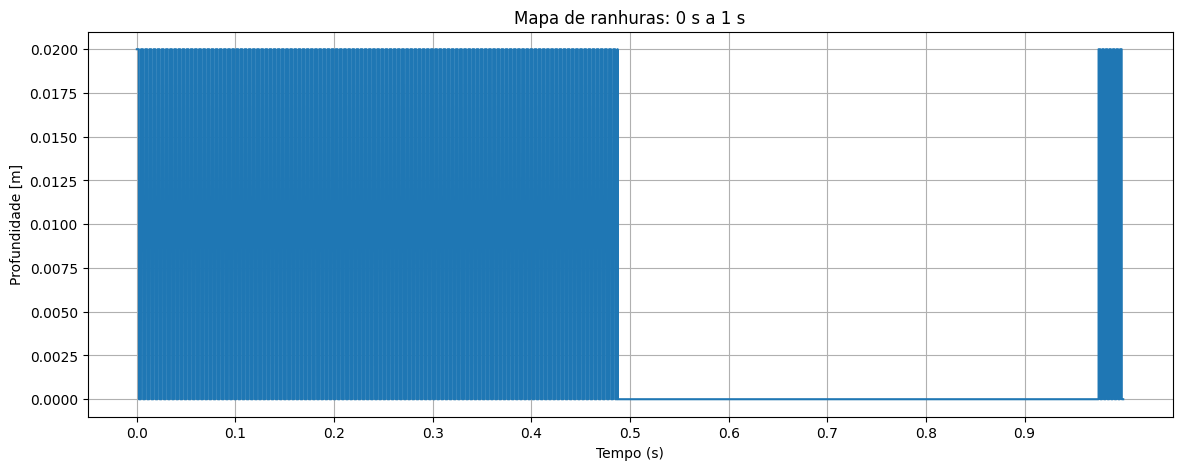

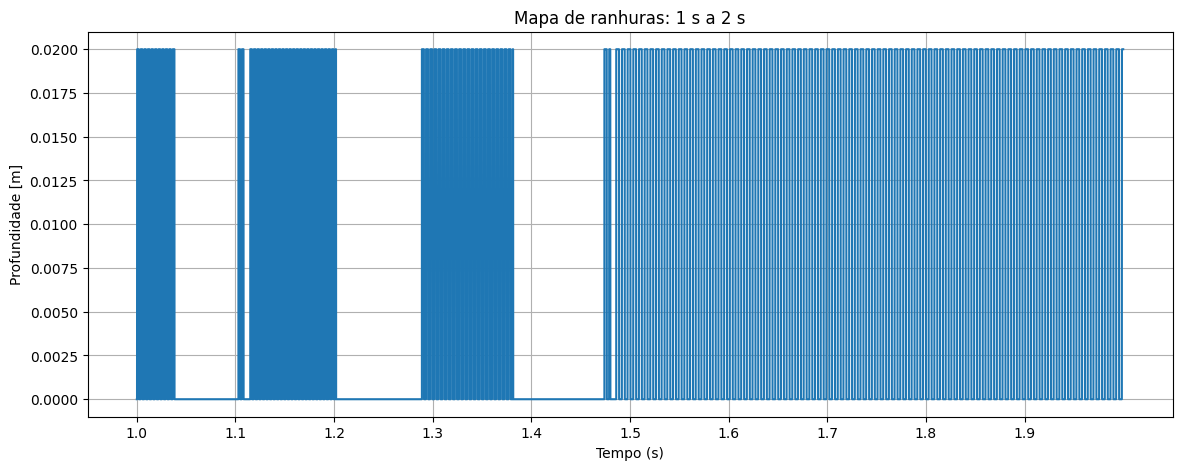

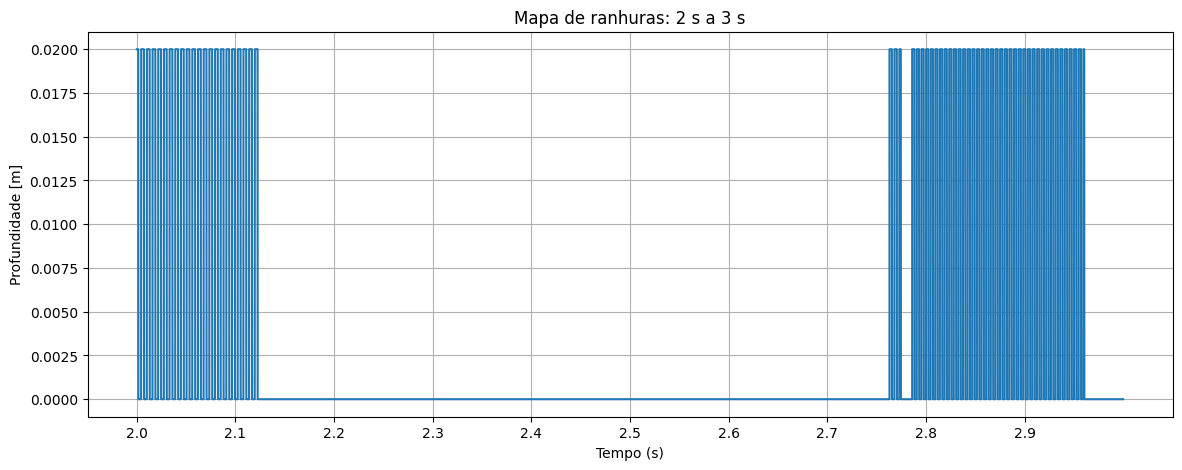

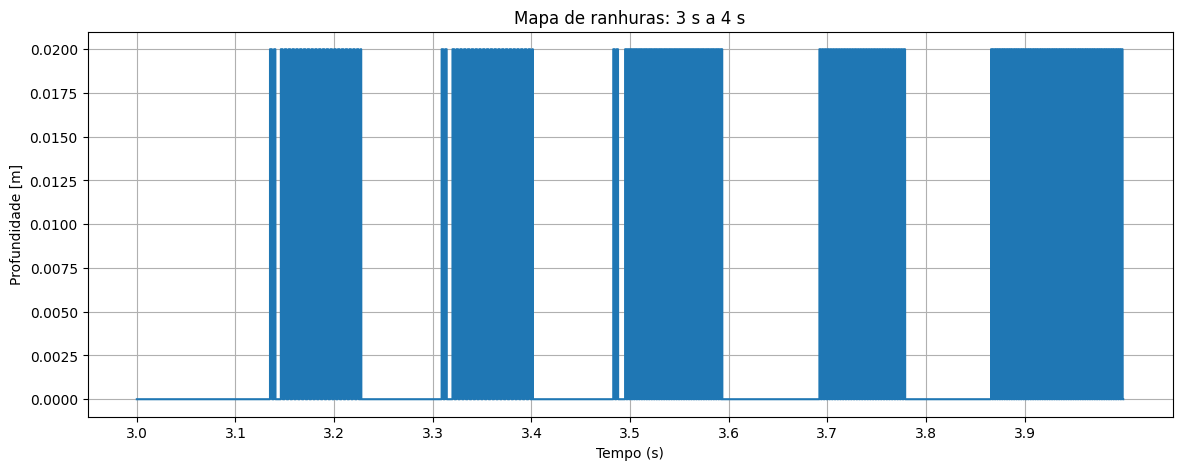

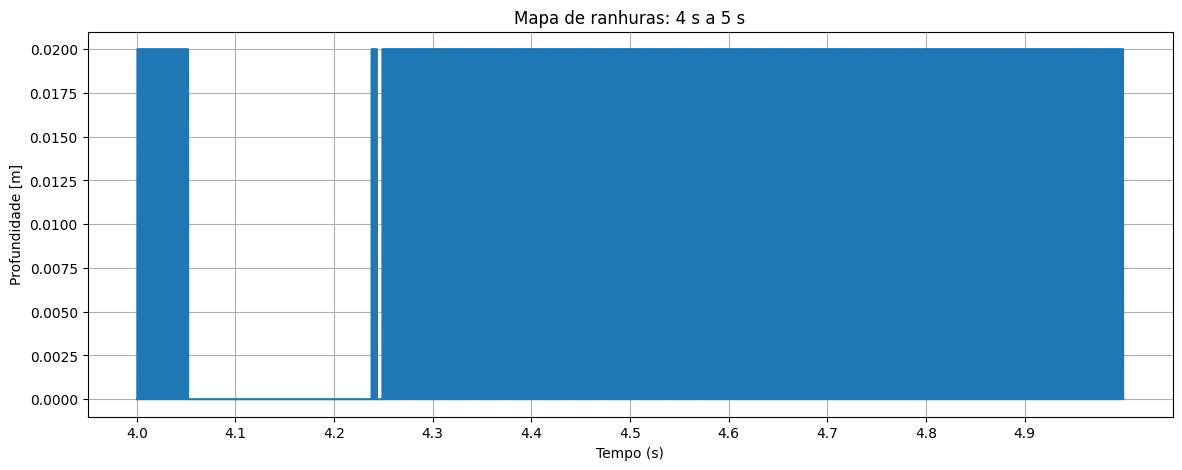

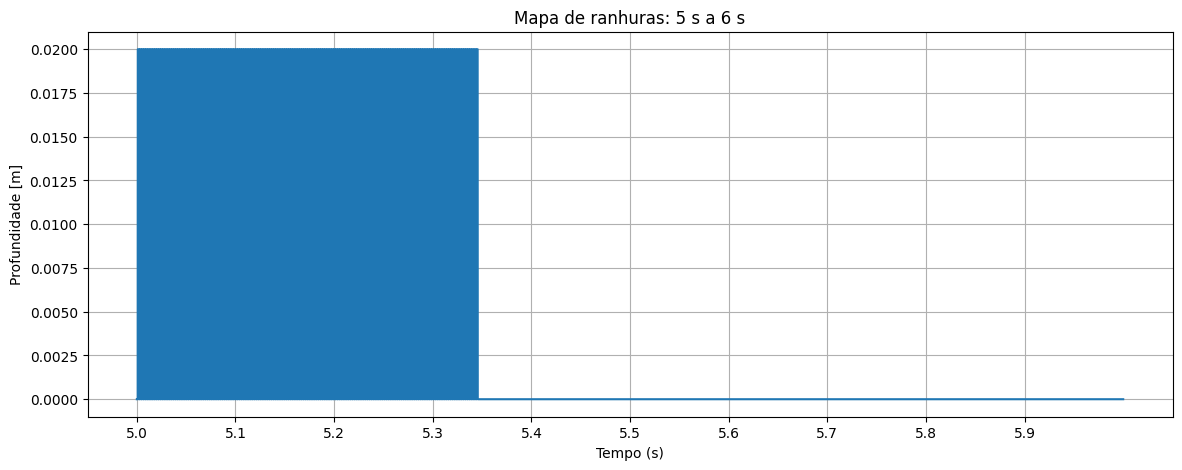

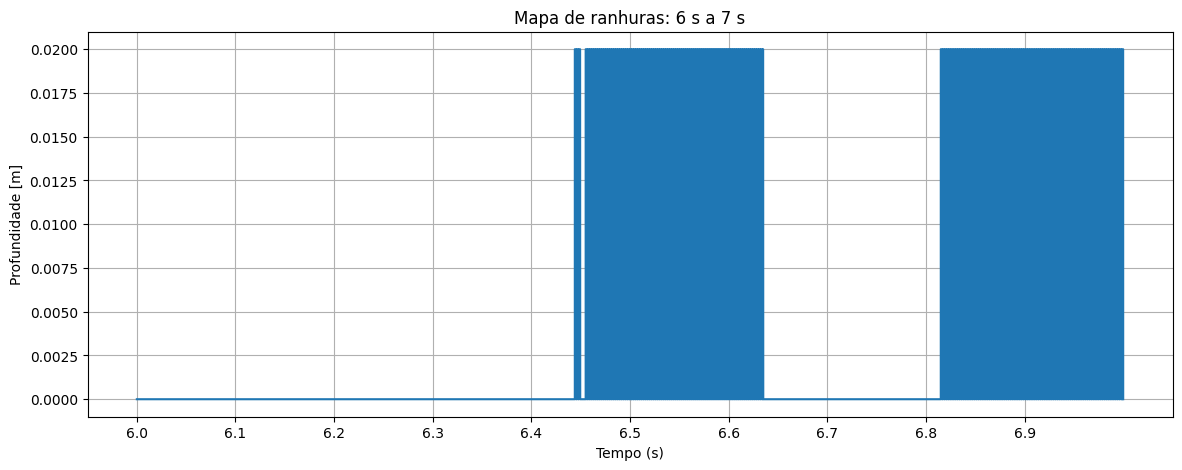

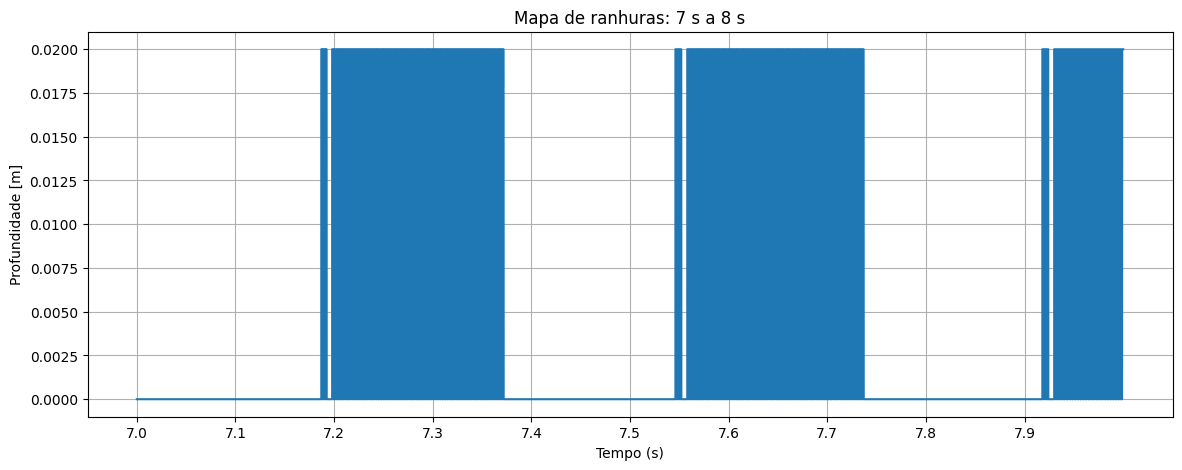

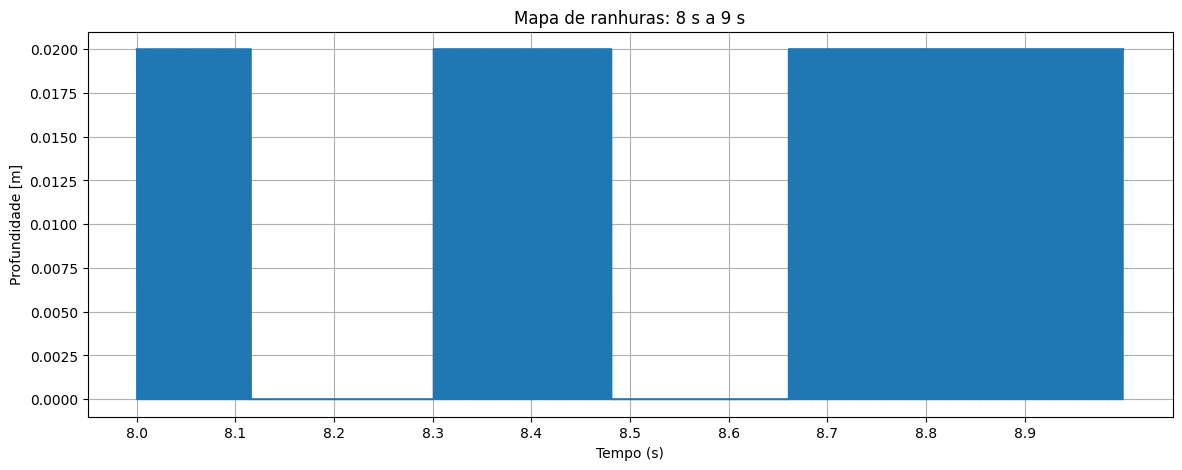

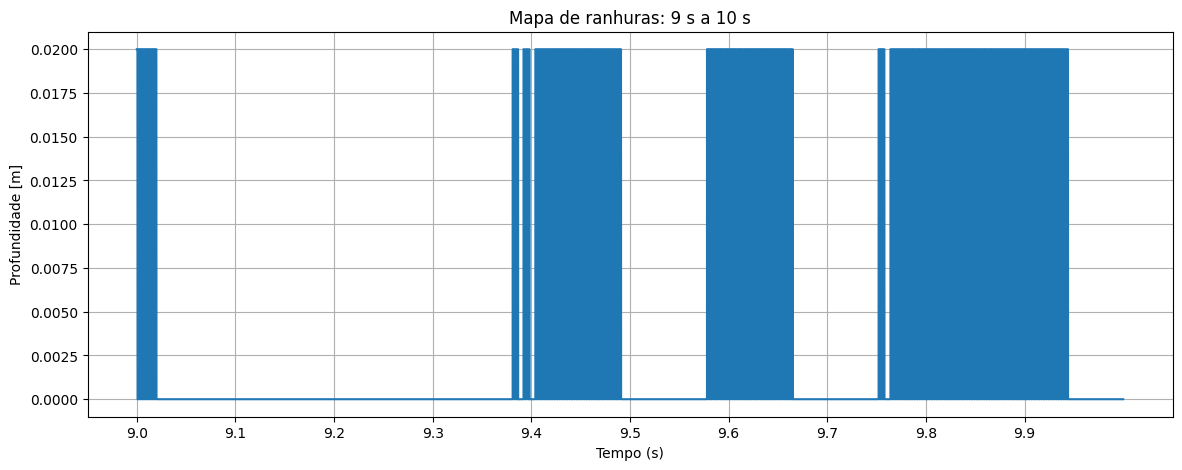

In [24]:
num_parts = 10
intervalo = 1  # cada parte terá 1 segundo

# Divida e plote
for i in range(num_parts):
    start_time = i * intervalo
    end_time = (i + 1) * intervalo
    df_part = df_ranhuras[(df_ranhuras['t'] >= start_time) & (df_ranhuras['t'] < end_time)]

    plt.figure(figsize=(14, 5))
    plt.plot(df_part['t'], df_part['Profundidade [m]'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Profundidade [m]')
    plt.title(f'Mapa de ranhuras: {start_time} s a {end_time} s')
    # plt.legend([f'{start_time} s - {end_time} s'])
    plt.grid(True)
    plt.xticks(np.arange(start_time, end_time, 0.1))
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


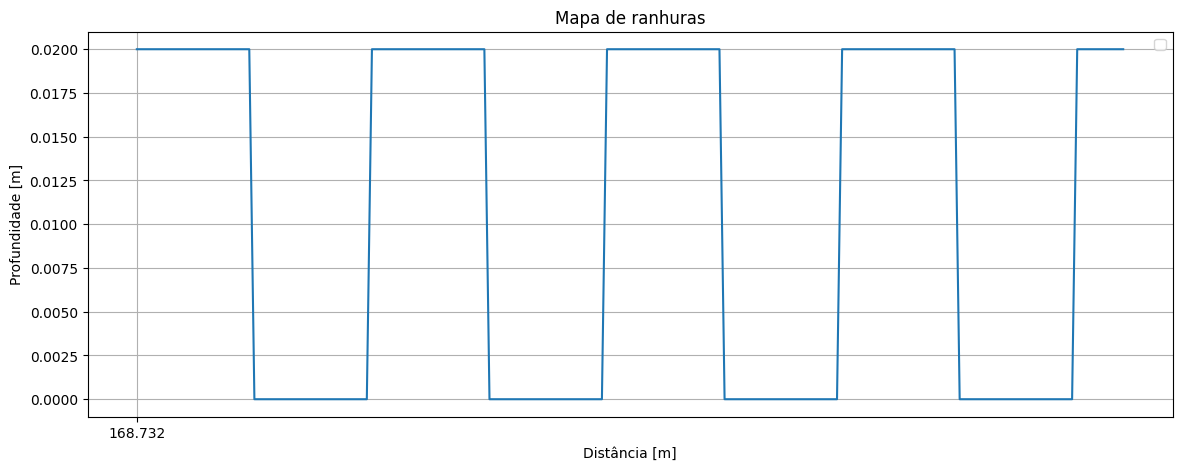

In [25]:
PROFUNDIDADE = 0.02
df_ranhuras_atual['Profundidade [m]'] = np.where(df_ranhuras_atual['w_or_d'] == 'W', PROFUNDIDADE, 0)
plt.figure(figsize=(14, 5))
plt.plot(df_ranhuras_atual['S'], df_ranhuras_atual['Profundidade [m]'])
plt.xlabel('Distância [m]')
plt.ylabel('Profundidade [m]')
plt.title('Mapa de ranhuras')
plt.legend()
plt.xticks(np.arange(df_ranhuras_atual['S'].min(),df_ranhuras_atual['S'].max(), 5))

plt.grid(True)
plt.show()

Ajuste da série de Fourier: a0 = 0.005003775981468636, a1 = -0.0005557468484346788, b1 = 0.0016680879028927594, w = 1.8131264583335809


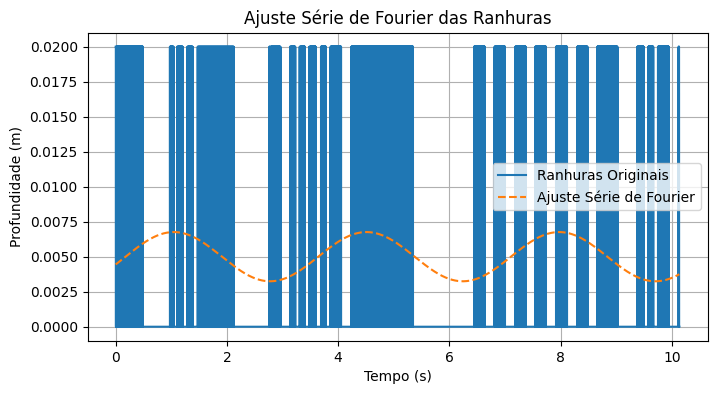

In [26]:
# serie de fourier
# precisamos achar uma função y(t) = Y*sen(Wt)
# para isso, pegamos um intervalo de frequencia dominante
# a partir desse intervalo, fazemos o fit da equação
# pegamos o w da equação resultante, e jogamos na formula da transmissibilidade

from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

freq_dominant = df_ranhuras['f'].agg(['mean'])


def fourier_series(t, a0, a1, b1, w):
    return a0 + a1 * np.cos(w * t) + b1 * np.sin(w * t)

popt, _ = curve_fit(fourier_series, df_ranhuras['t'], df_ranhuras['Profundidade [m]'])
a0, a1, b1, w = popt

print(f"Ajuste da série de Fourier: a0 = {a0}, a1 = {a1}, b1 = {b1}, w = {w}")

# Plot do ajuste
ranhuras_fit = fourier_series(df_ranhuras['t'], a0, a1, b1, w)

plt.figure(figsize=(8, 4))
plt.plot(df_ranhuras['t'], df_ranhuras['Profundidade [m]'], label='Ranhuras Originais')
plt.plot(df_ranhuras['t'], ranhuras_fit, label='Ajuste Série de Fourier', linestyle='--')
plt.title('Ajuste Série de Fourier das Ranhuras')
plt.xlabel('Tempo (s)')
plt.ylabel('Profundidade (m)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
def calcular_transmissibilidade_desloc(qsi, r):
    Td = ((1 + 2*qsi*(r**2)) / ((1 - r**2)**2 + (2*qsi*r)**2))**(1/2)
    return Td

In [28]:
# Considere o veículo como sendo um sistema de 1GDL com excitação na base
qsi = 0.3
massas = [1200, 2400, 4500] # kg
V_kmh = 60 
V_ms = V_kmh / 3.6
k = 20000 # https://www.mechanics-industry.org/articles/meca/full_html/2019/06/mi180235/mi180235.html
c = 545 # https://www.mechanics-industry.org/articles/meca/full_html/2019/06/mi180235/mi180235.html
for m in massas:
    # w = 2 * np.pi * f0 
    w_n = np.sqrt(k/m)
    r = w / w_n
    cc = c / qsi
    Td_i = calcular_transmissibilidade_desloc(qsi, r)
    print(f"Massa {m} | wn {w_n} | r {r} | Td {Td_i}")

Massa 1200 | wn 4.08248290463863 | r 0.44412346620568977 | Td 1.2502789597959
Massa 2400 | wn 2.886751345948129 | r 0.6280854292762353 | Td 1.5592597738629679
Massa 4500 | wn 2.1081851067789197 | r 0.8600413941372744 | Td 2.078961391614846


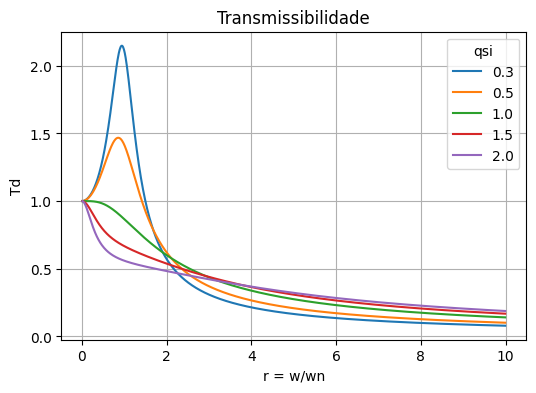

In [29]:

Td_is=[]
qsis = [0.3, 0.5, 1, 1.5, 2]
for qsi in qsis:
    for r in range(1, 1000):
        r = r/100
        Td_i = calcular_transmissibilidade_desloc(qsi, r)
        Td_is.append([qsi, r, Td_i])
df_transmissibilidade = pd.DataFrame(Td_is, columns=['qsi', 'r', 'Td'])
plt.figure(figsize=(6,4))
sns.lineplot(x=df_transmissibilidade['r'], y=df_transmissibilidade['Td'], hue=df_transmissibilidade['qsi'], palette='tab10')
plt.xlabel('r = w/wn')
plt.ylabel('Td')
plt.title('Transmissibilidade')
plt.grid(True)
plt.show()

![title](convolucao.png)

In [39]:
# para achar a resposta do sistema 
# precisamos achar uma função que descreva a força gerada pelas ranhuras
# com a função, aplicamos a integral de convolução e encontramos o deslocamento

df_ranhuras['dP/dt'] = np.append(np.diff(df_ranhuras['Profundidade [m]']) / np.diff(df_ranhuras['t']), np.nan)




# Função de resposta completa x(t) usando a integral de convolução
def response(t, f, m, w_n, qsi, w_d):
    dt = t[1] - t[0]
    x = np.zeros_like(t)
    for i in range(1, len(t)):
        tau = t[:i]
        integrand = f[:i] * np.exp(-qsi * w_n * (t[i] - tau)) * np.sin(w_d * (t[i] - tau))
        x[i] = (1 / (m * w_d)) * np.trapz(integrand, dx=dt)
    return x




C:\Users\muril\AppData\Local\Temp\ipykernel_8316\372782690.py:5: RuntimeWarning: divide by zero encountered in divide
  df_ranhuras['dP/dt'] = np.append(np.diff(df_ranhuras['Profundidade [m]']) / np.diff(df_ranhuras['t']), np.nan)


,S,t,w_or_d,%,f,Profundidade [m],dP/dt
34,0.034,0.002039,W,0.209179,236.865,0.02,-333.415385
69,0.069,0.004139,D,0.424511,236.865,0.00,333.415385
104,0.104,0.006238,W,0.639843,236.865,0.02,-333.415385
139,0.139,0.008338,D,0.855174,236.865,0.00,333.415385
174,0.174,0.010437,W,1.070506,236.865,0.02,-333.415385
...,...,...,...,...,...,...,...
3359,3.359,0.201490,D,20.665682,236.865,0.00,333.415385
3394,3.394,0.203590,W,20.881014,236.865,0.02,-333.415385
3429,3.429,0.205689,D,21.096346,236.865,0.00,333.415385
3464,3.464,0.207789,W,21.311677,236.865,0.02,-333.415385


![title](resposta.png)

In [31]:
# Sabendo que o som produzido na cabine será proporcional ao seu deslocamento,
# determine para qual massa haverá a maior transmissibilidade. Utilize a curva de
# transmissibilidade de um sistema de 1GDL para justificar a sua resposta.

def calcular_resposta_sistema(Y, t, w, qsi, r):
    """"
    Y: amplitude das ranhuras (y(t) = Y*sen(wt))
    t: vetor do tempo
    w:
    qsi: fator de amortecimento
    r: w/wn

    """
    X = Y * ((1 + 2*qsi*r**2) / ((1 - r**2) + (2*qsi*r)**2))**(1/2)
    phi = np.arctan( 2*qsi*r**3 / (1 + (4*qsi**2 -1)*r**2))

    x_p = X*np.sin(w*t - phi)
    return x_p




In [32]:
def impulse_response(t, m, c, k):
    W_n = np.sqrt(k / m) # freq natural
    qsi = c / (2 * np.sqrt(m * k)) # constante amortecimento
    W_d = W_n * np.sqrt(1 - qsi**2) # freq natual amortecida

    x_t = 

    return (1 / m) * np.exp(-qsi * W_n * t) * (np.cos(W_d * t) + (qsi / np.sqrt(1 - qsi**2)) * np.sin(W_d * t))



SyntaxError: invalid syntax (3299394612.py, line 6)

In [ ]:
def response(t, f, m, omega_n, zeta, omega_d):
    dt = t[1] - t[0]
    x = np.zeros_like(t)
    for i in range(1, len(t)):
        tau = t[:i]
        integrand = f[:i] * np.exp(-zeta * omega_n * (t[i] - tau)) * np.sin(omega_d * (t[i] - tau))
        x[i] = (1 / (m * omega_d)) * np.trapz(integrand, dx=dt)
    return x


: 